In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_csv('WSNBFSFdataset V2.csv')

In [3]:
df.head()

,Event,Time,S_Node,Node_id,Rest_Energy,Trace_Level,Mac_Type_Pckt,Source_IP_Port,Des_IP_Port,Packet_Size,...,Broadcast_ID,Dest_Node_Num,Dest_Seq_Num,Src_Node_ID,Src_Seq_Num,behaviour,Type,rate_of_energy_consumption,cumulative_energy_consumption,energy_consumption
0,1,0.100000,79,79,600.000000,5,0,79.255,1.255,48,...,1,100,0,79,4,No attack,normal,0.0,0.0,0.0
1,2,0.100963,78,78,599.979723,5,800,79.255,1.255,48,...,1,100,0,79,4,No attack,normal,0.0,0.0,0.0
2,2,0.100963,76,76,599.979722,5,800,79.255,1.255,48,...,1,100,0,79,4,No attack,normal,0.0,0.0,0.0
3,2,0.100964,75,75,599.979722,5,800,79.255,1.255,48,...,1,100,0,79,4,No attack,normal,0.0,0.0,0.0
4,2,0.100964,118,118,599.979722,5,800,79.255,1.255,48,...,1,100,0,79,4,No attack,normal,0.0,0.0,0.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 312106 entries, 0 to 312105
Data columns (total 22 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Event                          312106 non-null  int64  
 1   Time                           312106 non-null  float64
 2   S_Node                         312106 non-null  int64  
 3   Node_id                        312106 non-null  int64  
 4   Rest_Energy                    312106 non-null  float64
 5   Trace_Level                    312106 non-null  int64  
 6   Mac_Type_Pckt                  312106 non-null  int64  
 7   Source_IP_Port                 312106 non-null  float64
 8   Des_IP_Port                    312106 non-null  float64
 9   Packet_Size                    312106 non-null  int64  
 10  TTL                            312106 non-null  int64  
 11  Hop_Count                      312106 non-null  int64  
 12  Broadcast_ID                  

In [5]:
df.describe()

,Event,Time,S_Node,Node_id,Rest_Energy,Trace_Level,Mac_Type_Pckt,Source_IP_Port,Des_IP_Port,Packet_Size,TTL,Hop_Count,Broadcast_ID,Dest_Node_Num,Dest_Seq_Num,Src_Node_ID,Src_Seq_Num,rate_of_energy_consumption,cumulative_energy_consumption,energy_consumption
count,312106.000000,312106.000000,312106.000000,312106.000000,312106.000000,312106.0,312106.000000,312106.000000,3.121060e+05,312106.00000,312106.000000,312106.000000,312106.000000,312106.000000,312106.000000,312106.000000,312106.000000,312106.000000,312106.000000,312106.000000
mean,2.240694,171.643268,99.033985,99.033985,564.304358,5.0,799.841080,99.249765,1.255000e+00,58.16588,22.930709,6.717481,29.031685,142.348853,1.061117,134.138869,61.476665,0.257874,35.672661,0.045709
std,0.768737,95.862820,55.050837,55.050837,19.965393,0.0,11.274371,54.113212,3.686168e-12,22.05170,5.707731,2.878066,22.155234,43.186780,3.264662,54.115467,44.952879,0.635264,19.965414,0.235305
min,1.000000,0.100000,0.000000,0.000000,460.705905,5.0,0.000000,0.255000,1.255000e+00,48.00000,0.000000,1.000000,1.000000,36.000000,0.000000,0.000000,4.000000,0.000000,0.000000,0.000000
25%,2.000000,80.032883,53.000000,53.000000,544.581758,5.0,800.000000,54.255000,1.255000e+00,48.00000,21.000000,4.000000,7.000000,131.000000,0.000000,160.000000,16.000000,0.000000,16.524772,0.000000
50%,2.000000,160.640504,99.000000,99.000000,566.662834,5.0,800.000000,99.255000,1.255000e+00,48.00000,24.000000,6.000000,27.000000,149.000000,0.000000,160.000000,58.000000,0.274162,33.319791,0.000352
75%,2.000000,265.137521,145.000000,145.000000,583.452839,5.0,800.000000,143.255000,1.255000e+00,48.00000,26.000000,9.000000,49.000000,172.000000,0.000000,160.000000,102.000000,0.293960,55.395306,0.000961
max,4.000000,679.054956,199.000000,199.000000,600.000000,5.0,800.000000,199.255000,1.255000e+00,106.00000,30.000000,17.000000,70.000000,199.000000,17.000000,188.000000,144.000000,137.790170,139.270300,7.431883


In [6]:
df.isnull().sum()

Event                            0
Time                             0
S_Node                           0
Node_id                          0
Rest_Energy                      0
Trace_Level                      0
Mac_Type_Pckt                    0
Source_IP_Port                   0
Des_IP_Port                      0
Packet_Size                      0
TTL                              0
Hop_Count                        0
Broadcast_ID                     0
Dest_Node_Num                    0
Dest_Seq_Num                     0
Src_Node_ID                      0
Src_Seq_Num                      0
behaviour                        0
Type                             0
rate_of_energy_consumption       0
cumulative_energy_consumption    0
energy_consumption               0
dtype: int64

In [7]:
df.shape

(312106, 22)

In [8]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
for i in df.columns:
    if df[i].dtype == 'object':
        df[i] = label_encoder.fit_transform(df[i])

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 312106 entries, 0 to 312105
Data columns (total 22 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Event                          312106 non-null  int64  
 1   Time                           312106 non-null  float64
 2   S_Node                         312106 non-null  int64  
 3   Node_id                        312106 non-null  int64  
 4   Rest_Energy                    312106 non-null  float64
 5   Trace_Level                    312106 non-null  int64  
 6   Mac_Type_Pckt                  312106 non-null  int64  
 7   Source_IP_Port                 312106 non-null  float64
 8   Des_IP_Port                    312106 non-null  float64
 9   Packet_Size                    312106 non-null  int64  
 10  TTL                            312106 non-null  int64  
 11  Hop_Count                      312106 non-null  int64  
 12  Broadcast_ID                  

In [10]:
correlation_matrix = df.corr()

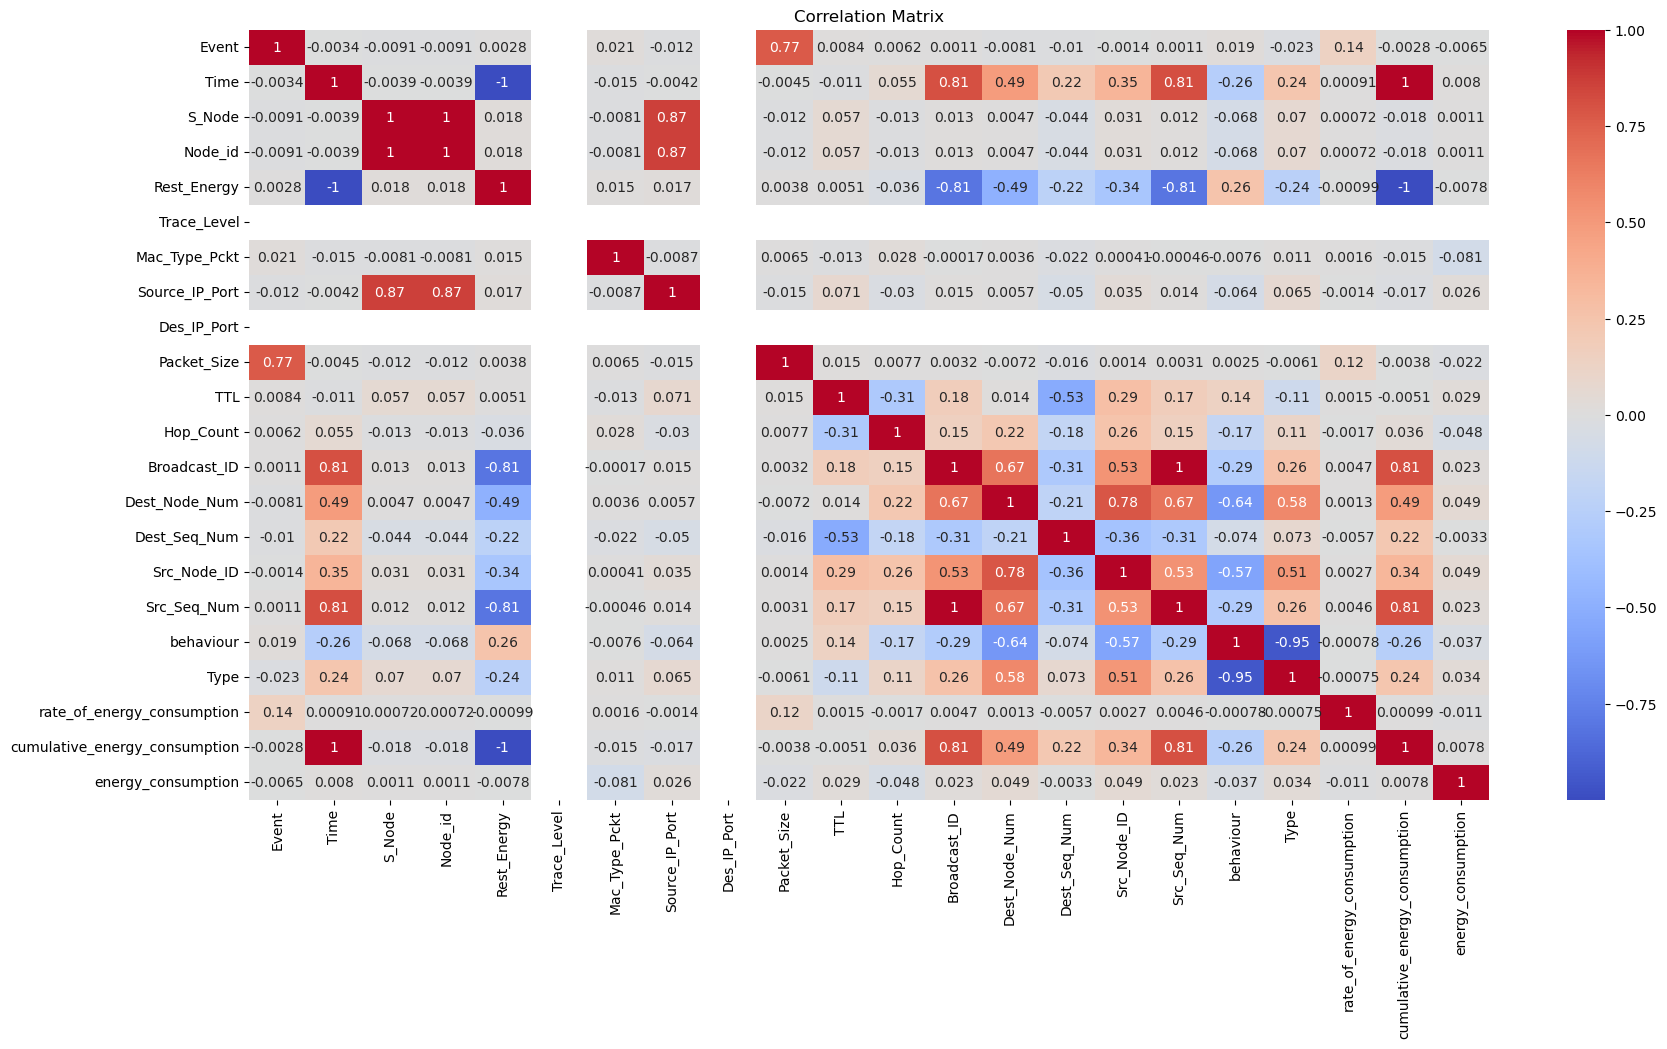

In [68]:
plt.figure(figsize=(20, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [12]:
df.drop(['Trace_Level','Des_IP_Port'],axis=1,inplace=True)

In [13]:
X=df.drop('rate_of_energy_consumption',axis=1)
y=df['rate_of_energy_consumption']

In [14]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [15]:
report = pd.DataFrame(columns=["LR_r2","KNN_r2","DT_r2","LR_rmse","KNN_rmse","DT_rmse"])
report

,LR_r2,KNN_r2,DT_r2,LR_rmse,KNN_rmse,DT_rmse


# SelectKBest

In [16]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
results = []

for k in range(1, X_train.shape[1] + 1):  
    selector = SelectKBest(f_regression, k=k)
    selector.fit(X_train, y_train)

    X_train_selected_kbest = selector.transform(X_train)
    X_test_selected_kbest = selector.transform(X_test)

    model = LinearRegression()
    model.fit(X_train_selected_kbest, y_train)

    y_pred = model.predict(X_test_selected_kbest)

    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    r2 = r2_score(y_test, y_pred)

    results.append({'k': k, 'MAE': mae, 'MSE': mse, 'RMSE': rmse, 'R2': r2})


results_df = pd.DataFrame(results)
sorted_results_df = results_df.sort_values(by='R2', ascending=False)
sorted_results_df


,k,MAE,MSE,RMSE,R2
12,13,0.166978,0.566653,0.752763,0.015618
13,14,0.167001,0.566655,0.752765,0.015613
11,12,0.166979,0.566657,0.752766,0.015611
10,11,0.166971,0.566667,0.752773,0.015594
9,10,0.166966,0.566668,0.752773,0.015591
4,5,0.166963,0.566669,0.752774,0.015590
17,18,0.166993,0.566670,0.752775,0.015588
16,17,0.166993,0.566670,0.752775,0.015588
14,15,0.167001,0.566671,0.752775,0.015587
18,19,0.166996,0.566671,0.752776,0.015586


In [17]:
from sklearn.feature_selection import SelectKBest, f_regression
# instantiate the feature selection model
selector = SelectKBest(f_regression, k=13)

# fit the model on the training data
selector.fit(X_train, y_train)

# transform the training and testing sets to keep only the selected features
X_train_selected_kbest = selector.transform(X_train)
X_test_selected_kbest = selector.transform(X_test)

# train a linear regression model on the selected features
model = LinearRegression()
model.fit(X_train_selected_kbest, y_train)

# make predictions on the testing set
y_pred = model.predict(X_test_selected_kbest)

# calculate regression metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

# print the selected features and regression metrics
print("Selected features:", X.columns[selector.get_support()])
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2:", r2)

Selected features: Index(['Event', 'Mac_Type_Pckt', 'Source_IP_Port', 'Packet_Size', 'TTL',
       'Hop_Count', 'Broadcast_ID', 'Dest_Node_Num', 'Dest_Seq_Num',
       'Src_Node_ID', 'Src_Seq_Num', 'Type', 'energy_consumption'],
      dtype='object')
MAE: 0.16697831346397224
MSE: 0.5666527102106214
RMSE: 0.752763382618085
R2: 0.015617902407539908


## Linear Regression

In [18]:
# initialize a list to store the results
lstResults = []
Results = {}
r2_values = []
rmse_values=[]
for i in range(30):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i)
    X_train_selected_kbest = selector.transform(X_train)
    X_test_selected_kbest = selector.transform(X_test)
    # train a linear regression model on the selected features
    model = LinearRegression().fit(X_train_selected_kbest, y_train)
    # make predictions on the testing set
    y_pred = model.predict(X_test_selected_kbest)

   # calculate regression metrics and append to the results list
    metrics = {'MAE': mean_absolute_error(y_test, y_pred), 
               'MSE': mean_squared_error(y_test, y_pred), 
               'RMSE': mean_squared_error(y_test, y_pred, squared=False), 
               'R2': r2_score(y_test, y_pred)}
    lstResults.append(metrics)
     # Calculate R2 score and store it
    r2 = r2_score(y_test, y_pred)
    r2_values.append(r2)
    rmse=mean_squared_error(y_test, y_pred, squared=False)
    rmse_values.append(rmse)
# Convert the list of R2 values to a pandas Series
r2_series = pd.Series(r2_values)
rmse_series = pd.Series(rmse_values)
# Add the R2 values to the report DataFrame
report['LR_r2'] = r2_series
report['LR_rmse']=rmse_series
# Convert the results to a DataFrame
data = pd.DataFrame(lstResults)
Results['LinearRegression']={'MAE': round(data['MAE'].mean(),3),
                             'MSE': round(data['MSE'].mean(),3),
                             'RMSE': round(data['RMSE'].mean(),3),
                             'R2': round(data['R2'].mean(),3)}
print("Results for LinearRegression:")
print(Results['LinearRegression'])

Results for LinearRegression:
{'MAE': 0.162, 'MSE': 0.402, 'RMSE': 0.622, 'R2': 0.022}


## KNN Regression

In [19]:
from sklearn.neighbors import KNeighborsRegressor

# initialize a list to store the results
lstResults = []
r2_values=[]
rmse_values=[]
for i in range(30):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i)
    X_train_selected_kbest = selector.transform(X_train)
    X_test_selected_kbest = selector.transform(X_test)

    # train a linear regression model on the selected features
    model =KNeighborsRegressor(n_neighbors=3).fit(X_train_selected_kbest, y_train)
    # make predictions on the testing set
    y_pred = model.predict(X_test_selected_kbest)

   # calculate regression metrics and append to the results list
    metrics = {'MAE': mean_absolute_error(y_test, y_pred), 
               'MSE': mean_squared_error(y_test, y_pred), 
               'RMSE': mean_squared_error(y_test, y_pred, squared=False), 
               'R2': r2_score(y_test, y_pred)}
    lstResults.append(metrics)
        # Calculate R2 score and store it
    r2 = r2_score(y_test, y_pred)
    r2_values.append(r2)
    rmse=mean_squared_error(y_test, y_pred, squared=False)
    rmse_values.append(rmse)
# Convert the list of R2 values to a pandas Series
r2_series = pd.Series(r2_values)
rmse_series = pd.Series(rmse_values)
# Add the R2 values to the report DataFrame
report['KNN_r2'] = r2_series
report['KNN_rmse']=rmse_series


# Convert the results to a DataFrame
data = pd.DataFrame(lstResults)
Results['KNN']={'MAE': round(data['MAE'].mean(),3),
                                'MSE': round(data['MSE'].mean(),3),
                                'RMSE': round(data['RMSE'].mean(),3),
                                'R2': round(data['R2'].mean(),3)}
print("Results for KNN:")
print(Results['KNN'])

Results for KNN:
{'MAE': 0.101, 'MSE': 0.375, 'RMSE': 0.598, 'R2': 0.102}


## Decision Tree 

In [20]:
from sklearn.tree import DecisionTreeRegressor
r2_values=[]
rmse_values=[]
# initialize a list to store the results
lstResults = []

for i in range(30):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i)
    X_train_selected_kbest = selector.transform(X_train)
    X_test_selected_kbest = selector.transform(X_test)


    # train a linear regression model on the selected features
    model =DecisionTreeRegressor().fit(X_train_selected_kbest, y_train)
    # make predictions on the testing set
    y_pred = model.predict(X_test_selected_kbest)

   # calculate regression metrics and append to the results list
    metrics = {'MAE': mean_absolute_error(y_test, y_pred), 
               'MSE': mean_squared_error(y_test, y_pred), 
               'RMSE': mean_squared_error(y_test, y_pred, squared=False), 
               'R2': r2_score(y_test, y_pred)}
    lstResults.append(metrics)
    r2 = r2_score(y_test, y_pred)
    r2_values.append(r2)
    rmse=mean_squared_error(y_test, y_pred, squared=False)
    rmse_values.append(rmse)
# Convert the list of R2 values to a pandas Series
r2_series = pd.Series(r2_values)
rmse_series = pd.Series(rmse_values)
# Add the R2 values to the report DataFrame
report['DT_r2'] = r2_series
report['DT_rmse']=rmse_series


# Convert the results to a DataFrame
data = pd.DataFrame(lstResults)
Results['DecisionTree']={'MAE': round(data['MAE'].mean(),3),
                                  'MSE': round(data['MSE'].mean(),3), 
                                  'RMSE': round(data['RMSE'].mean(),3), 
                                  'R2': round(data['R2'].mean(),3)}
print("Results for Decision Tree:")
print(Results['DecisionTree'])

Results for Decision Tree:
{'MAE': 0.051, 'MSE': 0.331, 'RMSE': 0.554, 'R2': 0.199}


# Sequantial feature selection

In [21]:
report_2 = pd.DataFrame(columns=["LR_r2","KNN_r2","DT_r2","LR_rmse","KNN_rmse","DT_rmse"])
report_2

,LR_r2,KNN_r2,DT_r2,LR_rmse,KNN_rmse,DT_rmse


In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [23]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [24]:
from sklearn.feature_selection import SequentialFeatureSelector
results_2 = []
for n_features_to_select in range(1, X_train.shape[1]):
    model =LinearRegression()
    sfs = SequentialFeatureSelector(model, n_features_to_select=n_features_to_select, direction='forward')
    sfs.fit(X_train, y_train)
   

    selected_features = X_train.columns[sfs.get_support()]
    X_train_selected_sfs = sfs.transform(X_train)
    X_test_selected_sfs = sfs.transform(X_test)

    model.fit(X_train_selected_sfs, y_train)
    y_pred = model.predict(X_test_selected_sfs)

    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    r2 = r2_score(y_test, y_pred)

    results_2.append({'n': n_features_to_select, 'MAE': mae, 'MSE': mse, 'RMSE': rmse, 'R2': r2})



In [25]:
results_df_2 = pd.DataFrame(results_2)
sorted_results_df_2 = results_df_2.sort_values(by='R2', ascending=False)
sorted_results_df_2

,n,MAE,MSE,RMSE,R2
14,15,0.166986,0.566642,0.752756,0.015636
15,16,0.167003,0.566652,0.752763,0.015620
7,8,0.166957,0.566655,0.752765,0.015614
9,10,0.166974,0.566661,0.752769,0.015604
13,14,0.166967,0.566661,0.752769,0.015604
11,12,0.166977,0.566663,0.752771,0.015599
8,9,0.166973,0.566664,0.752771,0.015599
12,13,0.166969,0.566664,0.752771,0.015599
6,7,0.166974,0.566665,0.752772,0.015597
16,17,0.167000,0.566666,0.752772,0.015594


In [26]:
model = LinearRegression()
sfs = SequentialFeatureSelector(model, n_features_to_select=13, direction='forward') #backward
sfs.fit(X_train, y_train)
selected_features = X.columns[sfs.get_support()]
print("Selected features:", selected_features)

Selected features: Index(['Event', 'S_Node', 'Node_id', 'Mac_Type_Pckt', 'Source_IP_Port',
       'Packet_Size', 'TTL', 'Hop_Count', 'Dest_Seq_Num', 'Src_Node_ID',
       'behaviour', 'Type', 'energy_consumption'],
      dtype='object')


In [27]:
X_train_selected_sfs = sfs.transform(X_train)
X_test_selected_sfs = sfs.transform(X_test)
model.fit(X_train_selected_sfs, y_train)

y_pred = model.predict(X_test_selected_sfs)

# Calculate the regression metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print("Regression Metrics:")
print("MAE:", round(mae, 3))
print("MSE:", round(mse, 3))
print("RMSE:", round(rmse, 3))
print("R²:", round(r2, 3))


Regression Metrics:
MAE: 0.167
MSE: 0.567
RMSE: 0.753
R²: 0.016


## Linear Regression

In [28]:
# initialize a list to store the results
lstResults_2 = []
Results_2 = {}
r2_values=[]
rmse_values=[]
for i in range(30):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i)
    X_train_selected_sfs = sfs.transform(X_train)
    X_test_selected_sfs = sfs.transform(X_test)
    # train a linear regression model on the selected features
    model = LinearRegression().fit(X_train_selected_sfs, y_train)
    # make predictions on the testing set
    y_pred = model.predict(X_test_selected_sfs)

   # calculate regression metrics and append to the results list
    metrics = {'MAE': mean_absolute_error(y_test, y_pred), 
               'MSE': mean_squared_error(y_test, y_pred), 
               'RMSE': mean_squared_error(y_test, y_pred, squared=False), 
               'R2': r2_score(y_test, y_pred)}
    lstResults_2.append(metrics)
    r2 = r2_score(y_test, y_pred)
    r2_values.append(r2)
    rmse=mean_squared_error(y_test, y_pred, squared=False)
    rmse_values.append(rmse)
# Convert the list of R2 values to a pandas Series
r2_series = pd.Series(r2_values)
rmse_series = pd.Series(rmse_values)
# Add the R2 values to the report DataFrame
report_2['LR_r2'] = r2_series
report_2['LR_rmse']=rmse_series
    


# Convert the results to a DataFrame
data_2 = pd.DataFrame(lstResults_2)
Results_2['LinearRegression']={'MAE': (data_2['MAE'].mean()),
                             'MSE': (data_2['MSE'].mean()),
                             'RMSE': (data_2['RMSE'].mean()),
                             'R2': (data_2['R2'].mean())}
print("Results for LinearRegression:")
print(Results_2['LinearRegression'])

Results for LinearRegression:
{'MAE': 0.16203050955553291, 'MSE': 0.4015156330683031, 'RMSE': 0.6216844141306854, 'R2': 0.02234245783459799}


## KNN Regression

In [29]:
from sklearn.neighbors import KNeighborsRegressor

# initialize a list to store the results
lstResults_2= []
r2_values=[]
rmse_values=[]
for i in range(30):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i)
    X_train_selected_sfs = sfs.transform(X_train)
    X_test_selected_sfs = sfs.transform(X_test)

    # train a linear regression model on the selected features
    model =KNeighborsRegressor(n_neighbors=3).fit(X_train_selected_sfs, y_train)
    # make predictions on the testing set
    y_pred = model.predict(X_test_selected_sfs)

   # calculate regression metrics and append to the results list
    metrics = {'MAE': mean_absolute_error(y_test, y_pred), 
               'MSE': mean_squared_error(y_test, y_pred), 
               'RMSE': mean_squared_error(y_test, y_pred, squared=False), 
               'R2': r2_score(y_test, y_pred)}
    lstResults_2.append(metrics)
    r2 = r2_score(y_test, y_pred)
    r2_values.append(r2)
    rmse=mean_squared_error(y_test, y_pred, squared=False)
    rmse_values.append(rmse)
# Convert the list of R2 values to a pandas Series
r2_series = pd.Series(r2_values)
rmse_series = pd.Series(rmse_values)
# Add the R2 values to the report DataFrame
report_2['KNN_r2'] = r2_series
report_2['KNN_rmse']=rmse_series


# Convert the results to a DataFrame
data_2 = pd.DataFrame(lstResults_2)
Results_2['KNN']={'MAE': round(data_2['MAE'].mean(),3),
                  'MSE': round(data_2['MSE'].mean(),3),
                  'RMSE': round(data_2['RMSE'].mean(),3),
                  'R2': round(data_2['R2'].mean(),3)}
print("Results for KNN:")
print(Results_2['KNN'])

Results for KNN:
{'MAE': 0.139, 'MSE': 0.451, 'RMSE': 0.663, 'R2': -0.128}


## Decsion Tree

In [30]:
from sklearn.tree import DecisionTreeRegressor

# initialize a list to store the results
lstResults_2 = []
r2_values=[]
rmse_values=[]
for i in range(30):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i)
    X_train_selected_sfs = sfs.transform(X_train)
    X_test_selected_sfs = sfs.transform(X_test)


    # train a linear regression model on the selected features
    model =DecisionTreeRegressor().fit(X_train_selected_sfs, y_train)
    # make predictions on the testing set
    y_pred = model.predict(X_test_selected_sfs)

   # calculate regression metrics and append to the results list
    metrics = {'MAE': mean_absolute_error(y_test, y_pred), 
               'MSE': mean_squared_error(y_test, y_pred), 
               'RMSE': mean_squared_error(y_test, y_pred, squared=False), 
               'R2': r2_score(y_test, y_pred)}
    lstResults_2.append(metrics)
    r2 = r2_score(y_test, y_pred)
    r2_values.append(r2)
    rmse=mean_squared_error(y_test, y_pred, squared=False)
    rmse_values.append(rmse)
# Convert the list of R2 values to a pandas Series
r2_series = pd.Series(r2_values)
rmse_series = pd.Series(rmse_values)
# Add the R2 values to the report DataFrame
report_2['DT_r2'] = r2_series
report_2['DT_rmse']=rmse_series


# Convert the results to a DataFrame
data_2 = pd.DataFrame(lstResults_2)
Results_2['DecisionTree']={'MAE': round(data_2['MAE'].mean(),3),
                                    'MSE': round(data_2['MSE'].mean(),3),
                                    'RMSE': round(data_2['RMSE'].mean(),3),
                                    'R2': round(data_2['R2'].mean(),3)}
print("Results for Decision Tree:")
print(Results_2['DecisionTree'])

Results for Decision Tree:
{'MAE': 0.058, 'MSE': 0.394, 'RMSE': 0.605, 'R2': 0.046}


In [36]:
Results

{'LinearRegression': {'MAE': 0.162, 'MSE': 0.402, 'RMSE': 0.622, 'R2': 0.022},
 'KNN': {'MAE': 0.101, 'MSE': 0.375, 'RMSE': 0.598, 'R2': 0.102},
 'DecisionTree': {'MAE': 0.051, 'MSE': 0.331, 'RMSE': 0.554, 'R2': 0.199}}

In [37]:
df_k=pd.DataFrame(Results)

#3

In [38]:
df_k

,LinearRegression,KNN,DecisionTree
MAE,0.162,0.101,0.051
MSE,0.402,0.375,0.331
RMSE,0.622,0.598,0.554
R2,0.022,0.102,0.199


In [42]:
df_sfs=pd.DataFrame(Results_2)
df_sfs

,LinearRegression,KNN,DecisionTree
MAE,0.162031,0.139,0.058
MSE,0.401516,0.451,0.394
RMSE,0.621684,0.663,0.605
R2,0.022342,-0.128,0.046


In [43]:
report

,LR_r2,KNN_r2,DT_r2,LR_rmse,KNN_rmse,DT_rmse
0,0.015618,0.071241,0.059022,0.752763,0.731186,0.735981
1,0.012623,0.092540,0.350893,0.809020,0.775588,0.655957
2,0.014955,0.064959,0.242065,0.722127,0.703559,0.633434
3,0.031757,0.191039,0.508285,0.480381,0.439094,0.342334
4,0.023017,0.196120,-0.100527,0.594252,0.539043,0.630707
5,0.023317,-0.127476,0.500160,0.586685,0.630350,0.419704
6,0.032137,0.160096,0.336739,0.507656,0.472909,0.420247
7,0.024058,0.115546,-0.373389,0.584830,0.556744,0.693768
8,0.032282,-0.080437,0.487955,0.472716,0.499488,0.343858
9,0.030835,0.224264,0.480256,0.476236,0.426070,0.348754


In [44]:
report_2

,LR_r2,KNN_r2,DT_r2,LR_rmse,KNN_rmse,DT_rmse
0,0.015599,-0.022604,0.017956,0.752771,0.767238,0.751869
1,0.012665,-0.042563,0.655060,0.809003,0.831321,0.478178
2,0.014953,-0.071361,0.170319,0.722127,0.753101,0.662737
3,0.031878,-0.176534,0.439846,0.480351,0.529536,0.365382
4,0.022932,-0.092537,0.263383,0.594279,0.628414,0.515999
5,0.023314,-0.174731,0.280097,0.586686,0.643424,0.503692
6,0.032194,-0.315587,0.318430,0.507641,0.591864,0.426008
7,0.023962,-0.199446,-0.896827,0.584859,0.648348,0.815326
8,0.032338,-0.140656,0.034804,0.472702,0.513219,0.472099
9,0.030809,-0.422695,-0.553812,0.476243,0.577005,0.603008


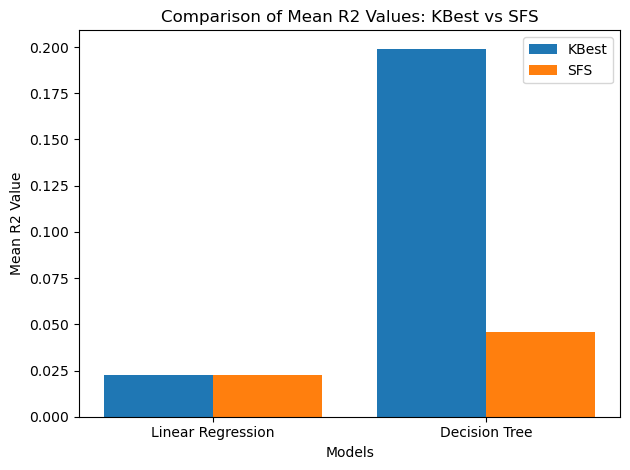

In [69]:


kbest_mean_r2 = report[['LR_r2', 'DT_r2']].mean()
sfs_mean_r2 = report_2[['LR_r2', 'DT_r2']].mean()


models = ['Linear Regression', 'Decision Tree']
x = range(len(models))

plt.bar(x, kbest_mean_r2, width=0.4, label='KBest', align='center')
plt.bar([i + 0.4 for i in x], sfs_mean_r2, width=0.4, label='SFS', align='center')

plt.xlabel('Models')
plt.ylabel('Mean R2 Value')
plt.title('Comparison of Mean R2 Values: KBest vs SFS')
plt.xticks([i + 0.2 for i in x], models)
plt.legend()

plt.tight_layout()
plt.show()


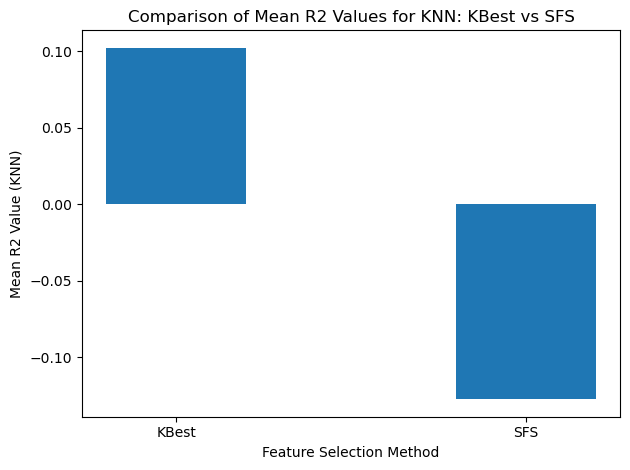

In [55]:

kbest_mean_r2_knn = report['KNN_r2'].mean()
sfs_mean_r2_knn = report_2['KNN_r2'].mean()


methods = ['KBest', 'SFS']
x = range(len(methods))

plt.bar(x, [kbest_mean_r2_knn, sfs_mean_r2_knn], width=0.4, align='center')

plt.xlabel('Feature Selection Method')
plt.ylabel('Mean R2 Value (KNN)')
plt.title('Comparison of Mean R2 Values for KNN: KBest vs SFS')
plt.xticks(x, methods)

plt.tight_layout()
plt.show()


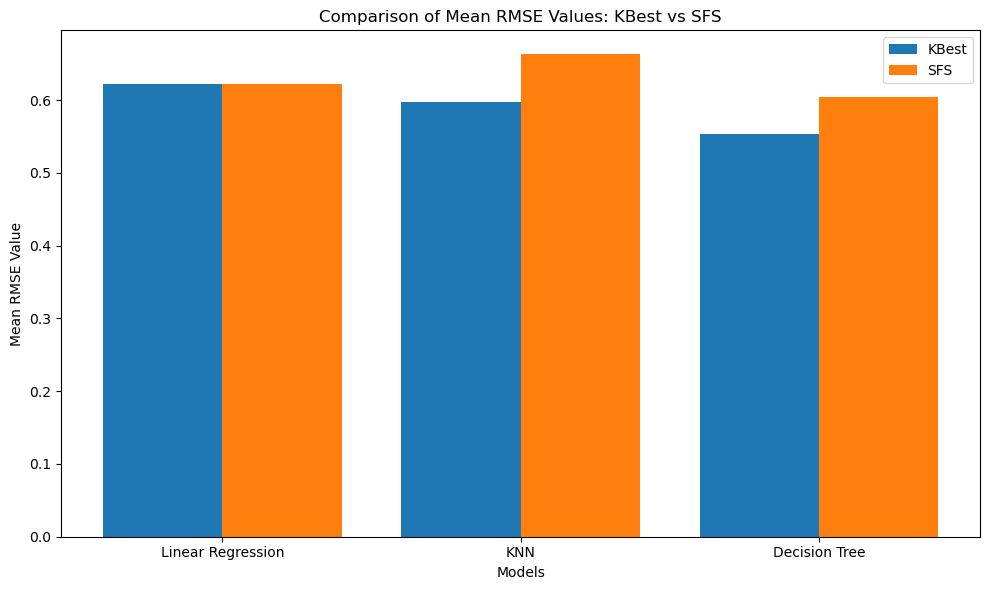

In [58]:

kbest_mean_rmse = report[['LR_rmse', 'KNN_rmse', 'DT_rmse']].mean()
sfs_mean_rmse = report_2[['LR_rmse', 'KNN_rmse', 'DT_rmse']].mean()


models = ['Linear Regression', 'KNN', 'Decision Tree']
x = range(len(models))
fig, ax = plt.subplots(figsize=(10, 6))
plt.bar(x, kbest_mean_rmse, width=0.4, label='KBest', align='center')
plt.bar([i + 0.4 for i in x], sfs_mean_rmse, width=0.4, label='SFS', align='center')

plt.xlabel('Models')
plt.ylabel('Mean RMSE Value')
plt.title('Comparison of Mean RMSE Values: KBest vs SFS')
plt.xticks([i + 0.2 for i in x], models)
plt.legend()

plt.tight_layout()
plt.show()


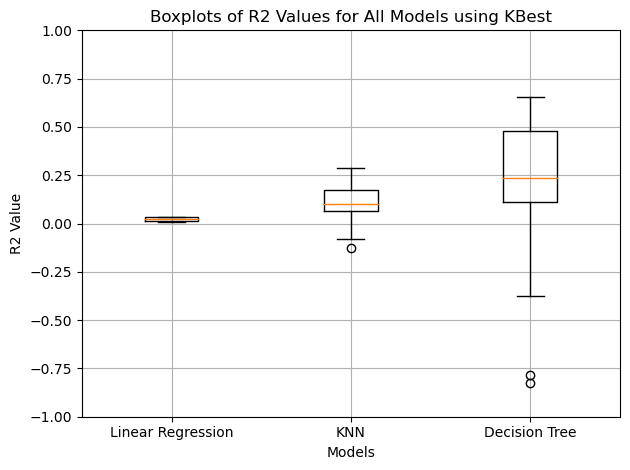

In [47]:

lr_r2_kbest = report['LR_r2']
knn_r2_kbest = report['KNN_r2']
dt_r2_kbest = report['DT_r2']


data = [lr_r2_kbest, knn_r2_kbest, dt_r2_kbest]
labels = ['Linear Regression', 'KNN', 'Decision Tree']

plt.boxplot(data, labels=labels)
plt.xlabel('Models')
plt.ylabel('R2 Value')
plt.title('Boxplots of R2 Values for All Models using KBest')
plt.ylim(-1, 1)  
plt.grid(True)

plt.tight_layout()
plt.show()


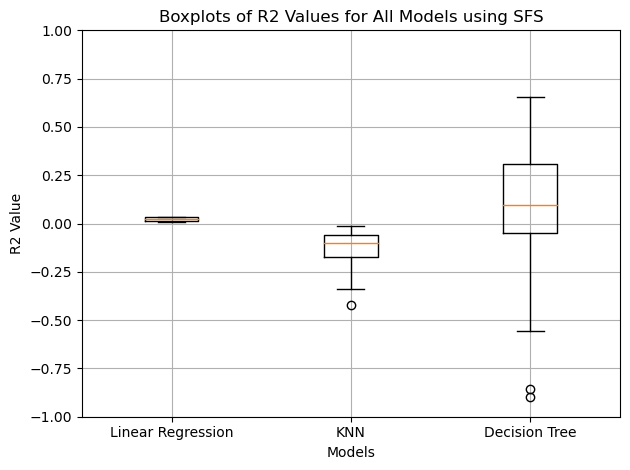

In [48]:


lr_r2_sfs = report_2['LR_r2']
knn_r2_sfs = report_2['KNN_r2']
dt_r2_sfs = report_2['DT_r2']


data = [lr_r2_sfs, knn_r2_sfs, dt_r2_sfs]
labels = ['Linear Regression', 'KNN', 'Decision Tree']

plt.boxplot(data, labels=labels)
plt.xlabel('Models')
plt.ylabel('R2 Value')
plt.title('Boxplots of R2 Values for All Models using SFS')
plt.ylim(-1, 1)  
plt.grid(True)

plt.tight_layout()
plt.show()


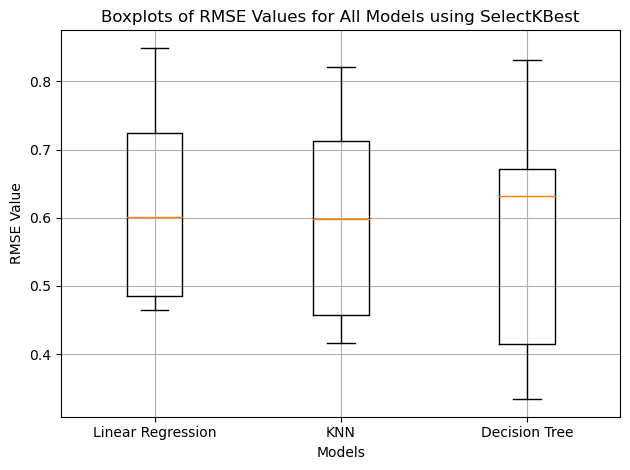

In [49]:

lr_rmse_selectkbest = report['LR_rmse']
knn_rmse_selectkbest = report['KNN_rmse']
dt_rmse_selectkbest = report['DT_rmse']


data = [lr_rmse_selectkbest, knn_rmse_selectkbest, dt_rmse_selectkbest]
labels = ['Linear Regression', 'KNN', 'Decision Tree']

plt.boxplot(data, labels=labels)
plt.xlabel('Models')
plt.ylabel('RMSE Value')
plt.title('Boxplots of RMSE Values for All Models using SelectKBest')
plt.grid(True)

plt.tight_layout()
plt.show()


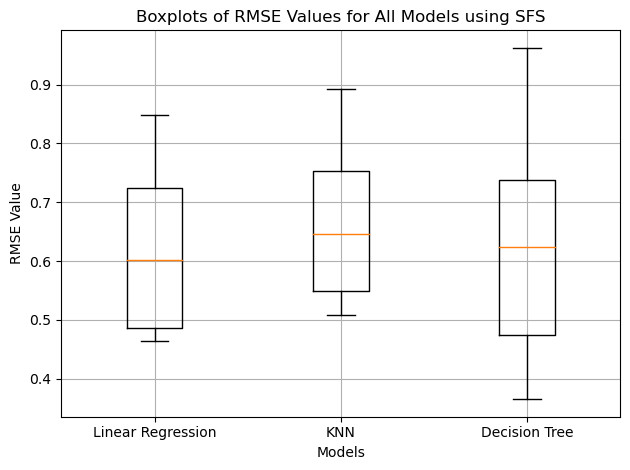

In [50]:

lr_rmse_sfs = report_2['LR_rmse']
knn_rmse_sfs = report_2['KNN_rmse']
dt_rmse_sfs = report_2['DT_rmse']

data = [lr_rmse_sfs, knn_rmse_sfs, dt_rmse_sfs]
labels = ['Linear Regression', 'KNN', 'Decision Tree']

plt.boxplot(data, labels=labels)
plt.xlabel('Models')
plt.ylabel('RMSE Value')
plt.title('Boxplots of RMSE Values for All Models using SFS')
plt.grid(True)

plt.tight_layout()
plt.show()
